In [0]:
# activate R magic
%load_ext rpy2.ipython

In [0]:
%%R
# Dataset
install.packages("mlbench") # Módulo contém dataset de Diabetes
library(mlbench) 

In [0]:
%%R
data(PimaIndiansDiabetes)

In [51]:
%%R
# Melhorando o nome do dataset
dataset <- PimaIndiansDiabetes
head(dataset)

  pregnant glucose pressure triceps insulin mass pedigree age diabetes
1        6     148       72      35       0 33.6    0.627  50      pos
2        1      85       66      29       0 26.6    0.351  31      neg
3        8     183       64       0       0 23.3    0.672  32      pos
4        1      89       66      23      94 28.1    0.167  21      neg
5        0     137       40      35     168 43.1    2.288  33      pos
6        5     116       74       0       0 25.6    0.201  30      neg


In [52]:
%%R
# Dimensões e tipos dos dados
# ?dim
dim(dataset)

[1] 768   9


In [53]:
%%R
str(dataset) # Extrair tipos de dados

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [54]:
%%R
# Sumário dos dados
summary(dataset)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

In [55]:
%%R
summary(dataset$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   24.00   29.00   33.24   41.00   81.00 


In [56]:
%%R
# A média de uma variável é uma medida numérica da localização central dos valores dos dados. 
# É a soma de seus valores dividido pela contagem de dados.
mean(dataset$age)  

[1] 33.24089


In [57]:
%%R
mean(dataset$age, na.rm = TRUE)  

[1] 33.24089


In [0]:
%%R
is.na(dataset$age)

In [59]:
%%R
# A mediana de uma variável é o valor no meio quando os dados são classificados em ordem crescente. 
# É uma medida ordinal da localização central dos valores de dados.
median(dataset$age) 

[1] 29


In [60]:
%%R
# Existem vários quartis de uma variável. O primeiro quartil, ou quartil inferior, é o valor 
# que corta os primeiros 25% dos dados quando é classificado em ordem crescente. 
# O segundo quartil, ou mediana, é o valor que corta os primeiros 50%. 
# O terceiro quartil, ou quartil superior, é o valor que corta os primeiros 75%.
quantile(dataset$age)     

  0%  25%  50%  75% 100% 
  21   24   29   41   81 


In [61]:
%%R
quantile(dataset$age, c(.32, .57, .98)) 

  32%   57%   98% 
25.00 31.00 64.66 


In [62]:
%%R
# Valor máximo e mínimo da variável
# O intervalo (range) de uma variável é a diferença de seus maiores e menores valores de dados. 
# É uma medida de quão distante os dados se espalham.
range(dataset$age)

[1] 21 81


In [63]:
%%R
# A variação interquartil de uma variável é a diferença de seus quartis superior e inferior. 
# É uma medida de quão distante a parte média dos dados se espalha.
IQR(dataset$age)

[1] 17


In [64]:
%%R
# O quão os dados estão dispersos ao redor da média
# A variância é uma medida numérica de como os valores dos dados estão dispersos em torno da média.
var(dataset$age)

[1] 138.303


In [18]:
%%R
# Para este exemplo, os dados estão em média 11 anos de distância da média da variável idade
# O desvio padrão de uma variável é a raiz quadrada de sua variância.
# O desvio padrão mede a dispersão dos seus dados (quão os dados estão distantes da média).
# Maior o desvio padrão, maor a dispersão dos dados, maior a distância da média.
sd(dataset$age) 

[1] 11.76023


In [65]:
%%R
# A covariância de duas variáveis x e y em um conjunto de dados mede como:
# duas variáveis estão linearmente relacionadas. 
# Uma covariância positiva indicaria uma relação linear positiva entre as variáveis, e uma 
# covariância negativa indicaria o contrário.
cov(dataset$age, dataset$glucose)


[1] 99.08281


In [20]:
%%R
# O coeficiente de correlação de duas variáveis em um conjunto de dados é igual a sua covariância 
# dividida pelo produto de seus desvios-padrão individuais. É uma medida normalizada de como os 
# dois estão linearmente relacionados. Os valores vão de -1 a +1. Valores próximos de zero indicadm 
# que não há correlação. Valor de -1 indica forte correlação negativa e +1 forte correlação positiva.
cor(dataset$age, dataset$glucose)
correlacoes <- cor(dataset[,1:8])
print(correlacoes)

            pregnant    glucose   pressure     triceps     insulin       mass
pregnant  1.00000000 0.12945867 0.14128198 -0.08167177 -0.07353461 0.01768309
glucose   0.12945867 1.00000000 0.15258959  0.05732789  0.33135711 0.22107107
pressure  0.14128198 0.15258959 1.00000000  0.20737054  0.08893338 0.28180529
triceps  -0.08167177 0.05732789 0.20737054  1.00000000  0.43678257 0.39257320
insulin  -0.07353461 0.33135711 0.08893338  0.43678257  1.00000000 0.19785906
mass      0.01768309 0.22107107 0.28180529  0.39257320  0.19785906 1.00000000
pedigree -0.03352267 0.13733730 0.04126495  0.18392757  0.18507093 0.14064695
age       0.54434123 0.26351432 0.23952795 -0.11397026 -0.04216295 0.03624187
            pedigree         age
pregnant -0.03352267  0.54434123
glucose   0.13733730  0.26351432
pressure  0.04126495  0.23952795
triceps   0.18392757 -0.11397026
insulin   0.18507093 -0.04216295
mass      0.14064695  0.03624187
pedigree  1.00000000  0.03356131
age       0.03356131  1.00000000


In [0]:
%%R
install.packages("corrplot")
library(corrplot)
corrplot(correlacoes, method = "circle")

In [0]:
%%R
# Pacote para as funções skewness e kurtosis
install.packages("e1071")
library(e1071) 

Em estatística, a assimetria (skewness) é uma medida da distorção da distribuição de probabilidade de uma variável aleatória sobre sua média. Em outras palavras, a assimetria informa a quantidade e a **direção da inclinação**(partida de simetria horizontal). 

Assimetria mais à esquerda, direita ou ao centro. 

O valor de assimetria pode ser positivo ou negativo ou ainda indefinido. Se a assimetria é 0, os dados são perfeitamente simétricos, embora seja bastante improvável para dados do mundo real. 

## Via de regra:

- Se a assimetria é menor que -1 ou maior que 1, a **distribuição é altamente distorcida.**

- Se a assimetria é entre -1 e -0,5 ou entre 0,5 e 1, a distribuição é enviesada moderadamente.

- Se a assimetria é entre -0,5 e 0,5, a distribuição é aproximadamente simétrica.

---


A medida positiva indicaria que a média dos valores dos dados é maior do que a mediana e a distribuição dos dados é desviada para a direita. Se média > mediana: distribuição direita

Uma medida negativa indica que a média dos valores dos dados é menor que a mediana e a distribuição dos dados é inclinada para a esquerda. Se média < mediana: distribuição esquerda

In [68]:
%%R
# ?skewness pacote {e1071}
skewness(dataset$age) # valor positivo indica que a média é maior que a mediana

[1] 1.125188


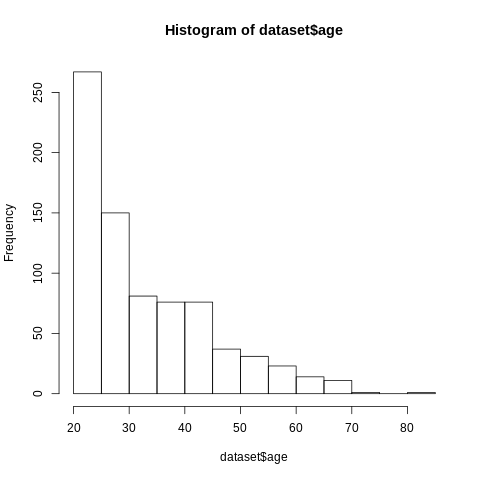

In [69]:
%%R
hist(dataset$age)

In [70]:
%%R
skewness(dataset$pressure)

[1] -1.836413


In [71]:
%%R
summary(dataset$pressure)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   62.00   72.00   69.11   80.00  122.00 


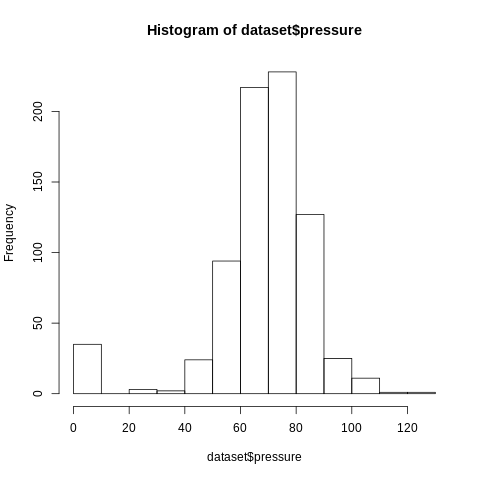

In [72]:
%%R
hist(dataset$pressure)

## Distribuição normal tem kurtosis igual a zero.

In [73]:
%%R
# A curtose informa a altura e a nitidez do pico central (ponto mais alto da distribuição), em relação a uma curva de sino padrão.
kurtosis(dataset$age) 

[1] 0.6217269


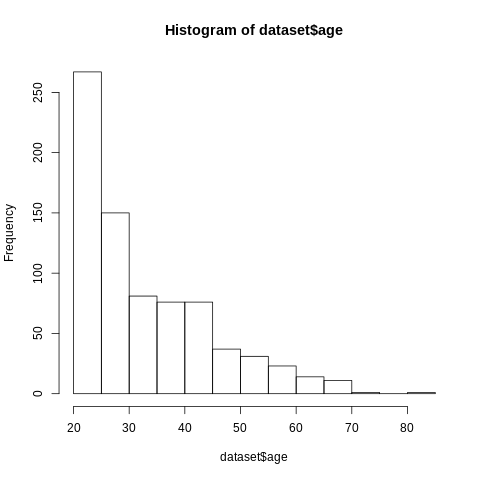

In [74]:
%%R
hist(dataset$age)

In [75]:
%%R
kurtosis(dataset$pressure)

[1] 5.11751


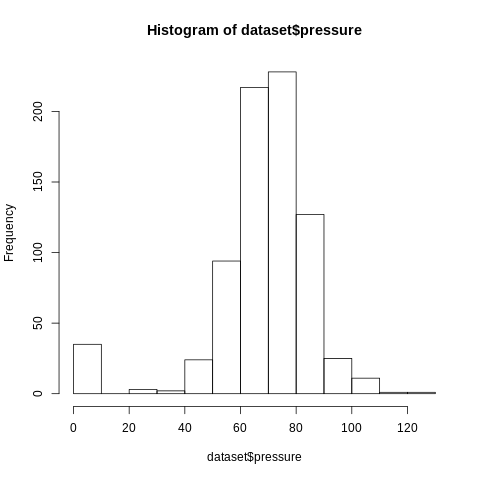

In [77]:
%%R
hist(dataset$pressure)

---

In [78]:
%%R
# Dados de exemplo
set.seed(140)
dados <- rnorm(n = 10000, mean = 55, sd = 4.5)
summary(dados)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  36.03   52.10   55.03   55.06   58.13   70.55 


In [79]:
%%R
mean(dados)

[1] 55.05733


In [0]:
%%R
# Converte os dados para um dataframe para facilitar a manipulação
dataset <- data.frame(dados)

In [0]:
%%R
# Renomeia a coluna
colnames(dataset) <- c("Medida")

---

In [82]:
%%R
# Estatísticas Elementares
mean(dataset$Medida)

[1] 55.05733


Média e Mediana são praticamente iguais, isso configura uma distribuição normal.

In [83]:
%%R
median(dataset$Medida)

[1] 55.03105


---

In [84]:
%%R
var(dataset$Medida)

[1] 20.1544


In [85]:
%%R
sd(dataset$Medida)

[1] 4.489365


In [2]:
%%R
# Moda
table(as.vector(dataset$Medida))

UsageError: Cell magic `%%R` not found.


In [87]:
%%R
table(as.vector(round(dataset$Medida)))


 36  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57 
  1   2   2   2  13  29  45  66 136 175 266 355 454 591 683 846 848 896 852 789 
 58  59  60  61  62  63  64  65  66  67  68  69  70  71 
717 604 504 365 290 160 131  83  38  26  16  11   3   1 


In [42]:
%%R
moda <- table(as.vector(round(dataset$Medida)))
names(moda)[moda == max(moda)]

[1] "55"


In [43]:
%%
# Sumário
summary(dataset)

UsageError: Cell magic `%%` not found.


In [0]:
%%R
# Assimetria e Curtose
library(e1071)

In [0]:
%%R
skewness(dados)

In [0]:
%%R
kurtosis(dados)

#**describe( )** - {psych}

In [0]:
%%R
# Usando a função 
install.packages("psych")
library("psych")

In [0]:
%%R
??describe
#describe(dataset)

#**Assimetria** - grau de afastamento de uma distribuição, indica inclinação da distribuição.

Uma Distribuição é Simétrica quando seus valores de Média, Mediana e Moda **coincidem.**

O coeficiente de assimetria **(skewness)** permite distinguir as distribuições assimétricas. 

- **Valor negativo**: indica que a cauda do lado esquerdo da função densidade de probabilidade é maior que a do lado direito. 

- **Valor positivo**: para a assimetria indica que a cauda do lado direito é maior que a do lado esquerdo. 

- **Valor nulo**: indica que os valores são distribuídos de maneira relativamente iguais em ambos os lados da média, mas não implica necessariamente, uma distribuição simétrica.

A assimetria dos dados simulados é negativa e próxima de zero. 
Isso conclui que os dados estão próximos de uma distribuição gaussiana (formato de sino), mas ligeiramente inclinados para a esquerda. 


---

#**Curtose** - medida de dispersão que caracteriza o "achatamento" da curva da função de distribuição. 

O que significa analisar um conjunto quanto à Curtose? Significa apenas verificar o “grau de achatamento da curva”.

Ou seja, saber se a Curva de Frequência que representa o conjunto é mais “afilada” ou mais “achatada” em relação a uma Curva Padrão, chamada de Curva Normal.

Uma curva (um conjunto) poderá ser, quanto à sua Curtose: 

- Mesocúrtica: ou de curtose média! Será essa a nossa Curva Normal. “Meso” lembra meio! Esta curva está no meio termo: nem muito achatada, nem muito afilada.

- Platicúrtica: é a curva mais achatada. Seu desenho lembra o de um prato emborcado. 

- Leptocúrtica: é a curva mais afilada! 

Quando se trata de Curtose, não há como extrairmos uma conclusão sobre qual será a situação da distribuição – se mesocúrtica, platicúrtica ou leptocúrtica – apenas conhecendo os valores **da Média, Moda e Mediana.**

Quando os dados seguem uma Distribuição normal nós temos uma serie de propriedades de características que podem ser inferidas a partir disso. Podemos tomar uma série de decisões com esta informação.

Com uma distribuição normal, o valor esperado para o coeficiente de Assimetria é próximo de 0. 



In [0]:
%%R
# Histograma
install.packages("ggplot2")
library(ggplot2)

In [0]:
%%R
ggplot(dataset, aes(x = dataset$Medida), binwidth = 20) + 
  geom_histogram(aes(y = ..density..), fill = 'red', alpha = 0.5) + 
  geom_density(colour = 'blue') + xlab(expression(bold('Dados de Exemplo'))) + 
  ylab(expression(bold('Densidade')))

In [0]:
%%R
# Carregando os dados
carros <- read.csv("dados/carros.csv", stringsAsFactors = FALSE)

In [11]:
%%R
# Sumário da estrutura do dataset
str(carros)
names(carros) <- c('Ano', 'Modelo', 'Preco', 'Kilometragem', 'Cor', 'Transmissao')

UsageError: Cell magic `%%` not found.


In [0]:
%%R
# Sumário
summary(carros$Ano)
str(carros)
carros$Ano <- as.character(carros$Ano)
summary(carros$Ano)
summary(carros[c("Preco", "Kilometragem")])

In [0]:
%%R
# Calculando a média
(36000 + 44000 + 56000) / 3
mean(c(36000, 44000, 56000))
mean(carros$Preco)

In [0]:
%%
# Mediana
median(carros$Preco)

In [0]:
%%
# Range - Min e Max
range(carros$Preco)

In [0]:
%%
# Diferença do Range (Max -  Min)
diff(range(carros$Preco))

In [0]:
%%
# IQR - Interquantile Range
IQR(carros$Preco)

In [0]:
%%
# Quartis
quantile(carros$Preco)

In [0]:
%%R
# Percentil 1% e 99%
quantile(carros$Preco, probs = c(0.01, 0.99))

In [0]:
%%R
# Percentis com intervalo de 20
quantile(carros$Preco, seq(from = 0, to = 1, by = 0.20))

In [0]:
%%R
# Boxplot
boxplot(carros$Preco, main = "Boxplot Preços", ylab = "Preço (R$)")
boxplot(carros$Kilometragem, main = "Boxplot Kilometragem", ylab = "Kilometragem (Km)")

In [0]:
%%
# Histograma
mean(carros$Preco)

In [0]:
%%
hist(carros$Preco, main = "Histograma Preços", xlab = "Preço (R$)")

In [0]:
%%
mean(carros$Kilometragem)

In [0]:
%%
hist(carros$Kilometragem, main = "Histograma Kilometragem", xlab = "Kilometragem (Km)")

In [0]:
%%R
# Assimetria e Curtose da variável Preço
library(e1071)
skewness(carros$Preco)

In [0]:
%%R
kurtosis(carros$Preco)


In [0]:
%%R
# Variância e Desvio Padrão
mean(carros$Preco)

In [0]:
%%R
var(carros$Preco)

In [0]:
%%R
sd(carros$Preco)

In [0]:
%%R
mean(carros$Kilometragem)

In [0]:
%%R
var(carros$Kilometragem)

In [0]:
%%R
sd(carros$Kilometragem)

In [0]:
%%R
# Scatter Plot
plot(x = carros$Kilometragem, y = carros$Preco,
     main = "Scatterplot Kilometragem x Preço",
     xlab = "Kilometragem (Km)",
     ylab = "Preço (R$)")

In [0]:
%%R
# Calculando o coeficiente de correlação
cor(carros$Kilometragem, carros$Preco)

In [0]:
%%R
# Agregação
#?aggregate

In [0]:
%%R
# Média de preços dos carros por ano
str(carros)

In [0]:
%%R
aggregate(carros$Preco ~ carros$Ano, FUN = mean, data = carros)

## Explorando variáveis categóricas

In [0]:
%%
# Tabela de Frequência
str(carros)

In [0]:
%%R
#?table
table(carros$Ano)

In [0]:
%%R
table(carros$Modelo)

In [0]:
%%R
table(carros$Cor)

In [0]:
%%R

In [0]:
%%R
# Proporções da Tabela de Frequência
model_table <- table(carros$Modelo)
prop.table(model_table)


In [0]:
%%R
# Ajuste do resultado das proporções
color_table <- table(carros$Cor)
color_pct <- prop.table(color_table) * 100
round(color_pct, digits = 1)

In [0]:
%%R
# Resumo gráfico e relação entre as variáveis categóricas
library(ggplot2)

In [0]:
%%R
# Total de veículos por tipo de transmissão
ggplot(data = carros, aes(x = as.factor(Transmissao))) +
  geom_bar(aes(y = (..count..))) +
  labs(x = "Transmissao", y = "Contagem de Carros Por Tipo de Transmissao")

In [0]:
%%R
str(carros)

In [0]:
%%R
# fatorando
carros$Transmissao <- as.factor(carros$Transmissao)
str(carros)

In [0]:
%%R
# Proporção de veículos por tipo de transmissão e por cor
ggplot(carros, aes(x = as.factor(Transmissao))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  xlab("Transmissao") +
  scale_y_continuous(labels = scales::percent, name = "Proporção") +
  facet_grid(~ Cor) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))